In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import random

In [2]:
dfdata = pd.read_csv('Brand_mobil_20102017.csv', parse_dates = ['Periode'], index_col = 'Periode')

In [3]:
dfdata.tail()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2017-09-01,27297.0,15507.0,15112.0,10934.0,9126.0,9720.0,87696.0
2017-10-01,30114.0,16760.0,17023.0,11831.0,9594.0,9111.0,94433.0
2017-11-01,28855.0,16360.0,15811.0,15291.0,11007.0,8867.0,96191.0
2017-12-01,23724.0,13028.0,15285.0,12775.0,10008.0,10278.0,85098.0
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dfdata.isna().head()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2010-01-01,False,False,False,False,False,False,False
2010-02-01,False,False,False,False,False,False,False
2010-03-01,False,False,False,False,False,False,False
2010-04-01,False,False,False,False,False,False,False
2010-05-01,False,False,False,False,False,False,False


In [5]:
dfdata.dropna(inplace = True)

In [6]:
dfdata.tail()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2017-08-01,34809.0,15821.0,17690.0,9185.0,10035.0,9716.0,97256.0
2017-09-01,27297.0,15507.0,15112.0,10934.0,9126.0,9720.0,87696.0
2017-10-01,30114.0,16760.0,17023.0,11831.0,9594.0,9111.0,94433.0
2017-11-01,28855.0,16360.0,15811.0,15291.0,11007.0,8867.0,96191.0
2017-12-01,23724.0,13028.0,15285.0,12775.0,10008.0,10278.0,85098.0


In [7]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2010-01-01 to 2017-12-01
Data columns (total 7 columns):
Toyota        96 non-null float64
Daihatsu      96 non-null float64
Honda         96 non-null float64
Mitsubishi    96 non-null float64
Suzuki        96 non-null float64
Others        96 non-null float64
Total         96 non-null float64
dtypes: float64(7)
memory usage: 6.0 KB


In [8]:
print('The data Time range from {} to {}'.format(dfdata.index.min(),dfdata.index.max()))

The data Time range from 2010-01-01 00:00:00 to 2017-12-01 00:00:00


## Data Preprocessing

In [9]:
tdata = dfdata[['Toyota','Daihatsu','Honda','Mitsubishi','Suzuki','Others']].resample('MS').mean()
tdata.head()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others
Periode,,,,,,
2010-01-01,20803.0,8302.0,3755.0,6855.0,4815.0,8301.0
2010-02-01,21800.0,7518.0,4431.0,8246.0,4638.0,9055.0
2010-03-01,26287.0,8084.0,5179.0,9068.0,6203.0,10734.0
2010-04-01,24422.0,9298.0,5154.0,9560.0,6013.0,10785.0
2010-05-01,21050.0,9485.0,4439.0,9544.0,6043.0,9959.0


In [10]:
#visual
td = dfdata['Daihatsu'].resample('MS').mean()

C:\Users\GILANG\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


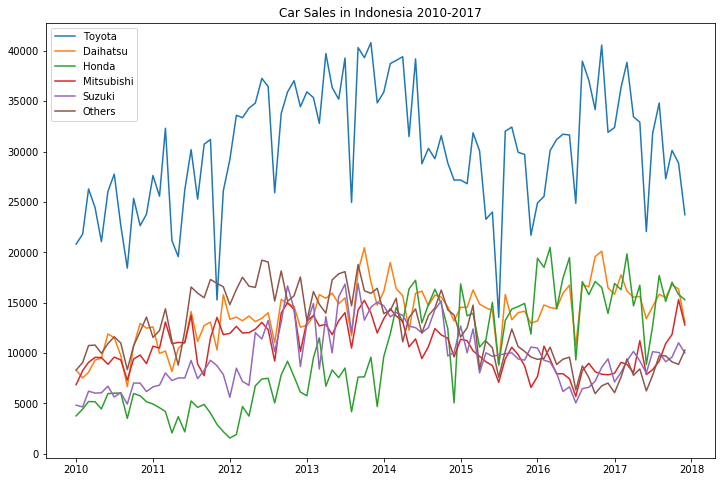

In [11]:
plt.figure(figsize = (12,8))
plt.title('Car Sales in Indonesia 2010-2017')

plt.plot(tdata['Toyota'], label = 'Toyota')
plt.plot(tdata['Daihatsu'], label = 'Daihatsu')
plt.plot(tdata['Honda'], label = 'Honda')
plt.plot(tdata['Mitsubishi'], label = 'Mitsubishi')
plt.plot(tdata['Suzuki'], label = 'Suzuki')
plt.plot(tdata['Others'], label = 'Others')
plt.legend()
plt.show()

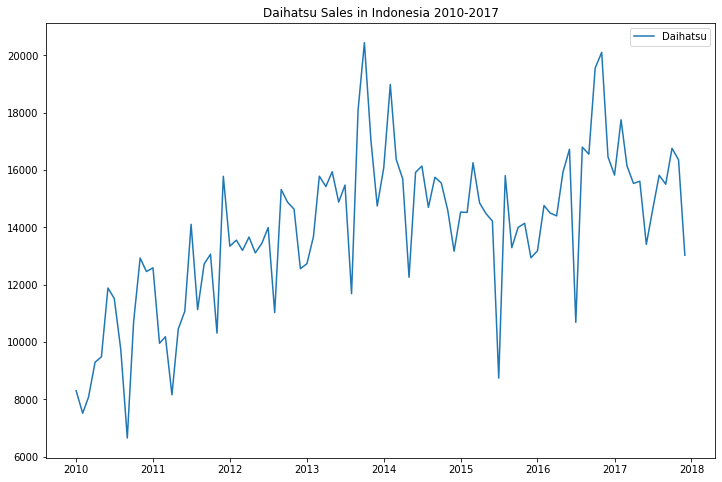

In [12]:
plt.figure(figsize = (12,8))
plt.title('Daihatsu Sales in Indonesia 2010-2017')
plt.plot(tdata['Daihatsu'], label = 'Daihatsu')
plt.legend()
plt.show()

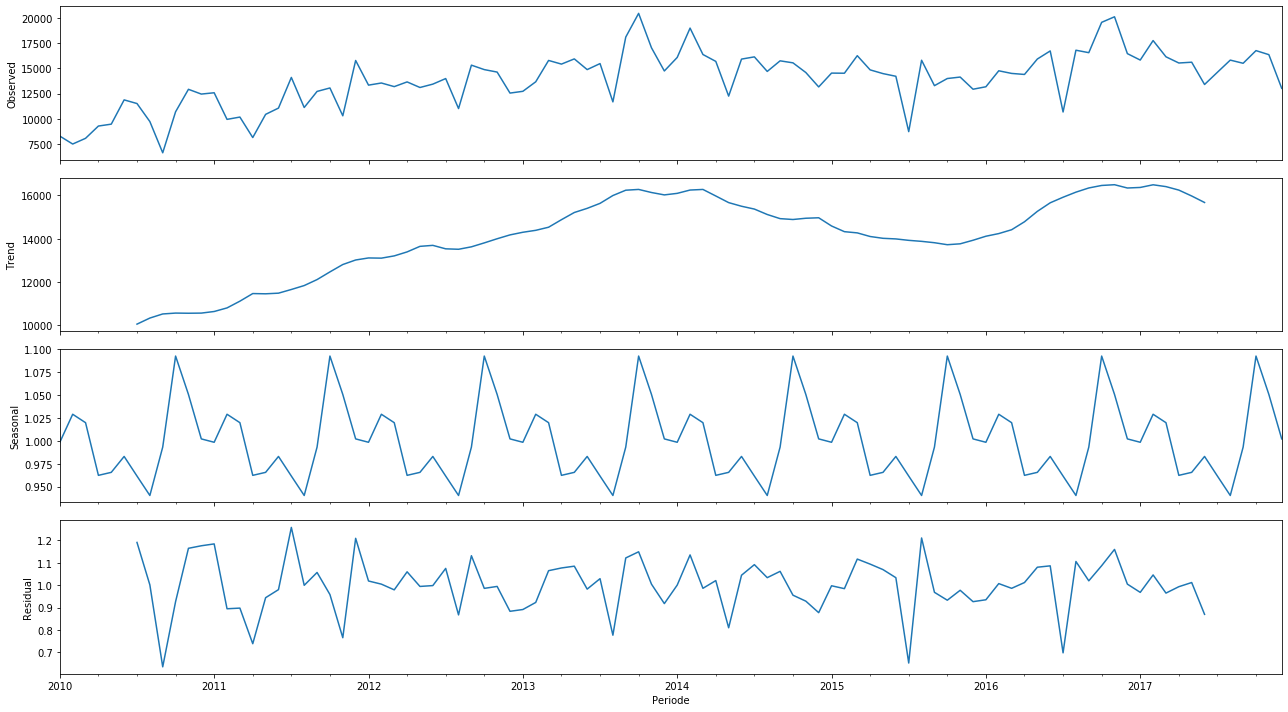

In [13]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(td, model='multipicative')
fig = decomposition.plot()
plt.show()

In [14]:
decomposition.seasonal.head(10)

Periode
2010-01-01    0.998551
2010-02-01    1.029188
2010-03-01    1.019972
2010-04-01    0.962387
2010-05-01    0.965663
2010-06-01    0.983051
2010-07-01    0.961606
2010-08-01    0.940370
2010-09-01    0.993295
2010-10-01    1.092816
Freq: MS, Name: Daihatsu, dtype: float64

In [15]:
decomposition.resid.head(10)

Periode
2010-01-01         NaN
2010-02-01         NaN
2010-03-01         NaN
2010-04-01         NaN
2010-05-01         NaN
2010-06-01         NaN
2010-07-01    1.191116
2010-08-01    1.001654
2010-09-01    0.635933
2010-10-01    0.926926
Freq: MS, Name: Daihatsu, dtype: float64

Made per DataFrame

In [16]:
dftoyota = dfdata['Toyota']
dftoyota.head()

dfdaihatsu = dfdata['Daihatsu']
dfdaihatsu.head()

dfhonda = dfdata['Honda']
dfhonda.head()

dfmitsubishi = dfdata['Mitsubishi']
dfmitsubishi.head()

dfsuzuki = dfdata['Suzuki']
dfsuzuki.head()

dfothers = dfdata['Others']
dfothers.head()

dftoyota.head()
dfdaihatsu.head()
dfhonda.head()
dfmitsubishi.head()
dfsuzuki.head()
dfothers.head()

Periode
2010-01-01     8301.0
2010-02-01     9055.0
2010-03-01    10734.0
2010-04-01    10785.0
2010-05-01     9959.0
Name: Others, dtype: float64

Dickey-Fuller Test

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
dfcar_brand = [dftoyota,dfdaihatsu,dfhonda,dfmitsubishi,dfsuzuki,dfothers]
dfname = ['Toyota :', 'Daihatsu :','Honda :','Mitsubishi :', 'Suzuki :','Others :']

In [19]:
for index, i in enumerate(dfcar_brand):
    result = adfuller(i)
    print(dfname[index])
    print('ADF Statistic:{}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    
    #all data non statisioner, need diferensiation ( danta < o,o5 )

Toyota :
ADF Statistic:-2.7038963342563753
p-value: 0.07336645650211786
Daihatsu :
ADF Statistic:-2.5512394982040516
p-value: 0.10349954448917553
Honda :
ADF Statistic:-0.7472288279341994
p-value: 0.8341341321905049
Mitsubishi :
ADF Statistic:-1.799449654505583
p-value: 0.3807349590833119
Suzuki :
ADF Statistic:-1.9043213510014503
p-value: 0.3300309496726761
Others :
ADF Statistic:-1.1290154724704395
p-value: 0.7033632852005766


## Differencing

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

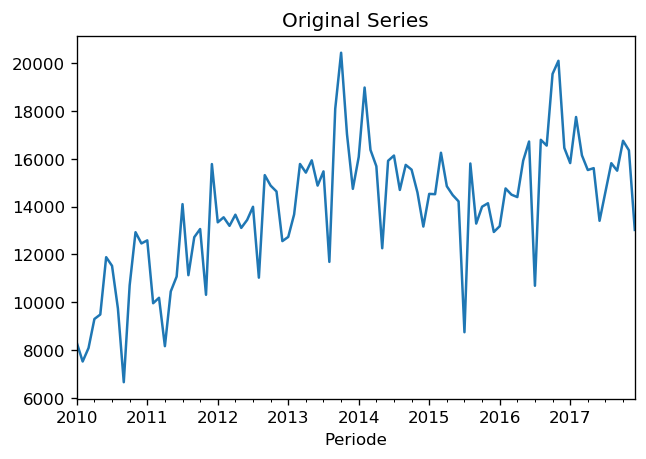

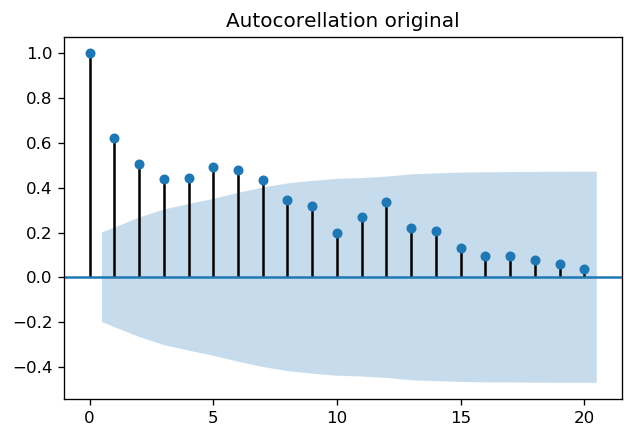

ADF Statistic:-2.5512394982040516
p-value: 0.10349954448917553


In [21]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})

# Original Series
ori = dfdaihatsu.plot()
ori.set_title('Original Series')
plot_acf(dfdaihatsu, title = 'Autocorellation original')

plt.show()

result = adfuller(dfdaihatsu.dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

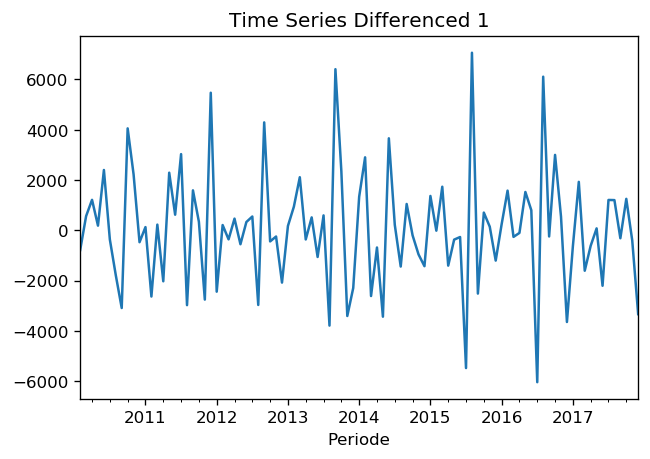

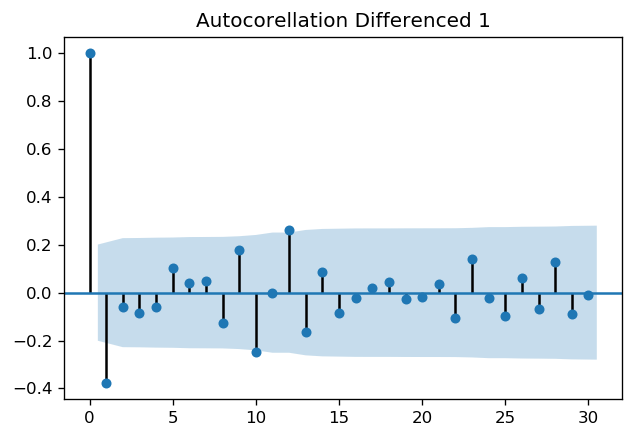

ADF Statistic:-7.619802017330329
p-value: 2.143435849006207e-11


In [22]:
# Differencing 1
diff1 = dfdaihatsu.diff().dropna().plot()
diff1.set_title('Time Series Differenced 1')
plot_acf(dfdaihatsu.diff().dropna(),lags =30,  title = 'Autocorellation Differenced 1')
plt.show()

result = adfuller(dfdaihatsu.diff().dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

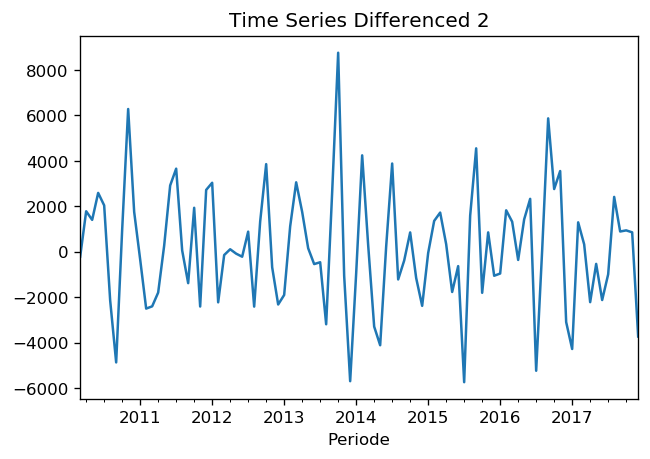

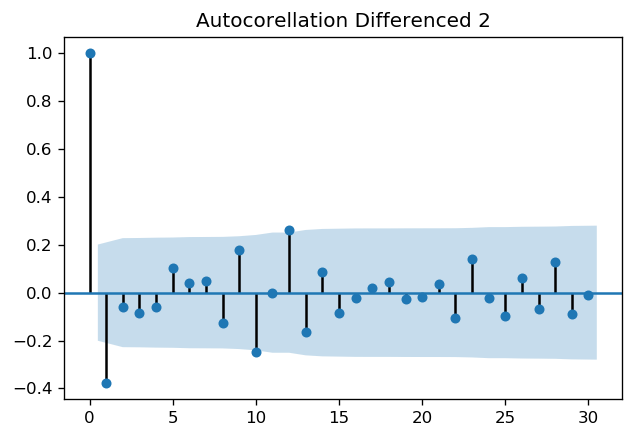

ADF Statistic:-2.981961633744292
p-value: 0.036613641144693204


In [23]:
# Differencing 2
diff2 = dfdaihatsu.diff(2).dropna().plot()
diff2.set_title('Time Series Differenced 2')
plot_acf(dfdaihatsu.diff().dropna(),lags =30,  title = 'Autocorellation Differenced 2')
plt.show()

#Dif 2
result = adfuller(dfdaihatsu.diff(2).dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

In [24]:
result = adfuller(dfdaihatsu.dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('\n')

#Dif  1
result = adfuller(dfdaihatsu.diff().dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('\n')

#Dif 2
result = adfuller(dfdaihatsu.diff(2).dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))


ADF Statistic:-2.5512394982040516
p-value: 0.10349954448917553


ADF Statistic:-7.619802017330329
p-value: 2.143435849006207e-11


ADF Statistic:-2.981961633744292
p-value: 0.036613641144693204


Data yang akan di gunakan ada lah ada  dif-2 karna p-value dibawah mendeakati 0.05,

In [25]:
d_difference_2 = dfdaihatsu.diff().diff().dropna()

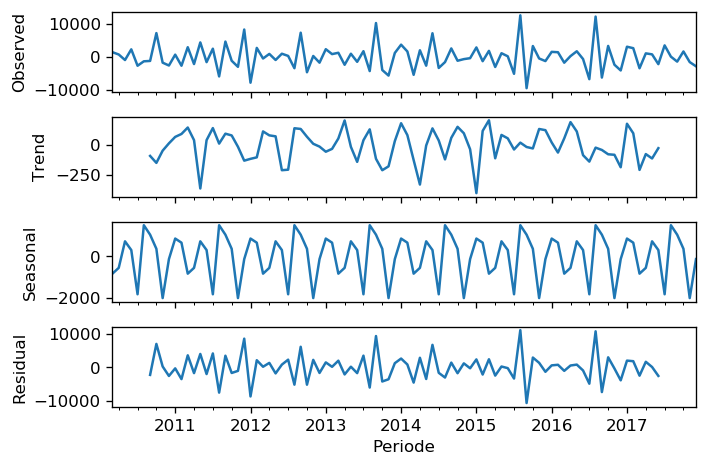

In [26]:
#yang akan digunakanadalah model Additive karena plot terlihat seperti mengikuti addition model
d_decomposition_difference_2 = sm.tsa.seasonal_decompose(d_difference_2, model='additive') 
fig = d_decomposition_difference_2.plot()
plt.show()

In [27]:
d_deseason = d_difference_2/ d_decomposition_difference_2.seasonal

In [28]:
d_decomposition_difference_2.seasonal.tail()

Periode
2017-08-01    1496.378555
2017-09-01    1038.305142
2017-10-01     356.620618
2017-11-01   -2022.659144
2017-12-01    -140.700810
Name: Daihatsu, dtype: float64

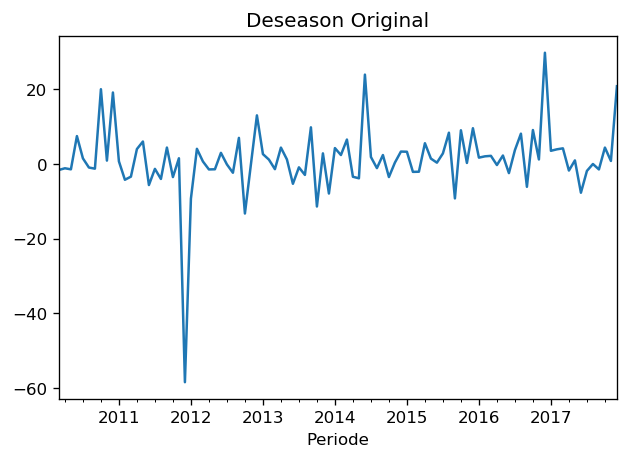

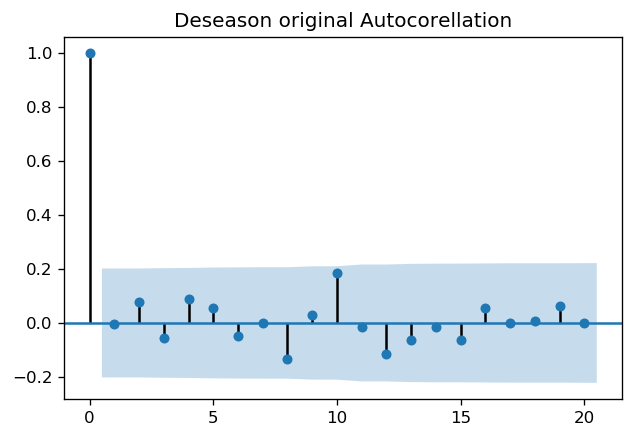

In [29]:
#Deseason original
d_ori_deseason = d_deseason.plot()
d_ori_deseason.set_title('Deseason Original')
plot_acf(d_deseason, title = 'Deseason original Autocorellation')

plt.show()

In [30]:
result = adfuller(d_deseason)
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

ADF Statistic:-9.357585732511758
p-value: 7.982003213525352e-16


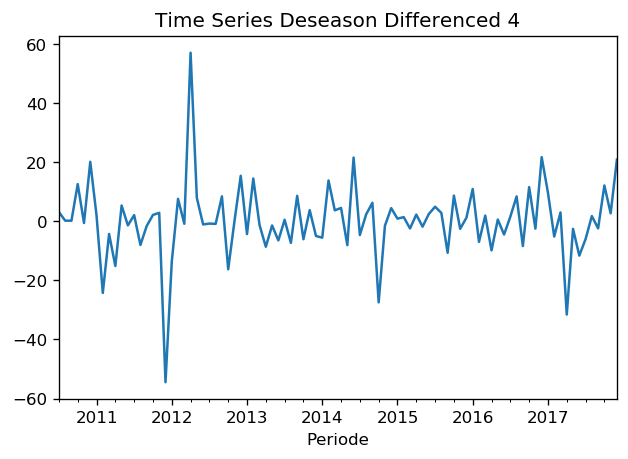

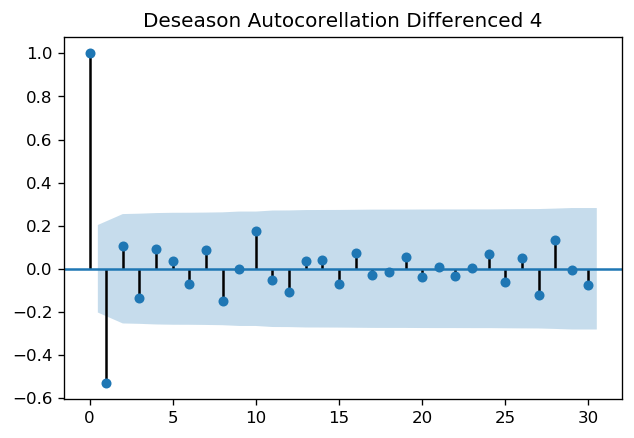

In [31]:
# 1st Differencing
diff1_deseason = d_deseason.diff(4).dropna().plot()
diff1_deseason.set_title('Time Series Deseason Differenced 4')
plot_acf(d_deseason.diff().dropna(),lags = 30, title = 'Deseason Autocorellation Differenced 4')

plt.show()

In [32]:
result = adfuller(d_deseason.diff(4).dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

ADF Statistic:-4.0289309125891055
p-value: 0.0012663713267123448


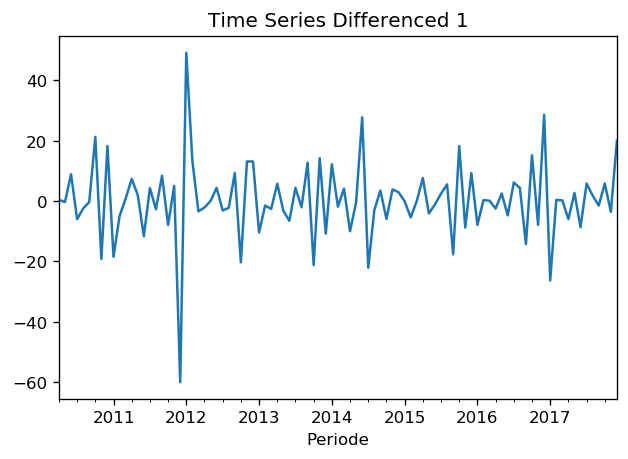

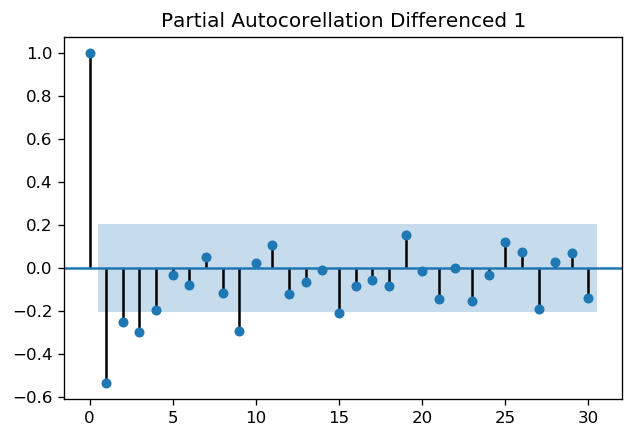

In [33]:
#PACF
diff1 = d_deseason.diff().dropna().plot()
diff1.set_title('Time Series Differenced 1')
plot_pacf(d_deseason.diff().dropna(), lags = 30, title = 'Partial Autocorellation Differenced 1')

plt.show()

## ARIMA

In [34]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(d_deseason,order =(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.Daihatsu   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -340.005
Method:                       css-mle   S.D. of innovations              9.138
Date:                Wed, 20 Nov 2019   AIC                            688.009
Time:                        07:00:35   BIC                            698.139
Sample:                    04-01-2010   HQIC                           692.099
                         - 12-01-2017                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0508      0.034      1.479      0.143      -0.017       0.118
ar.L1.D.Daihatsu    -0.0122      0.106     -0.115      0.908      -0.220       0.195
ma.L1.D.Daihatsu    -1.0000 

C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


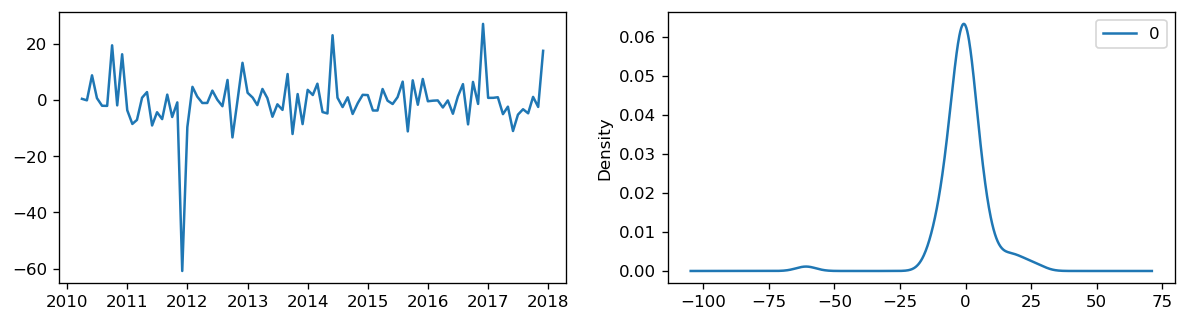

In [35]:
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
ax[0].plot(residuals.index, residuals.values)
residuals.plot.kde( ax=ax[1])


plt.show()

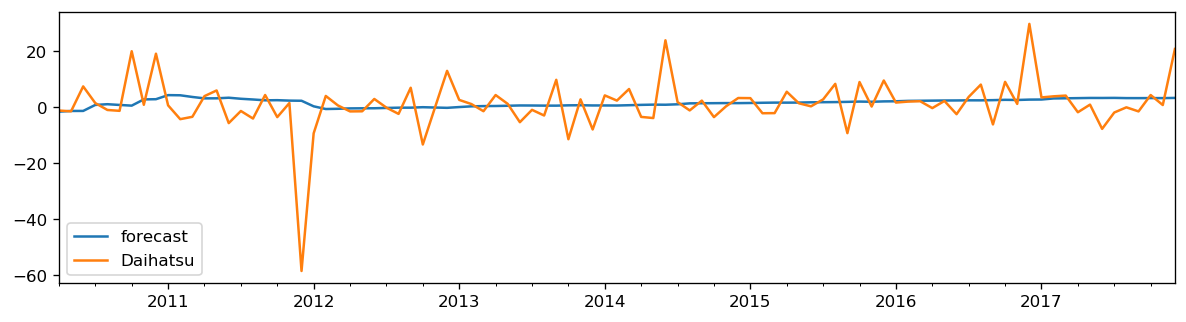

In [36]:
model_fit.plot_predict(dynamic=False)
plt.show()

Validation

C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


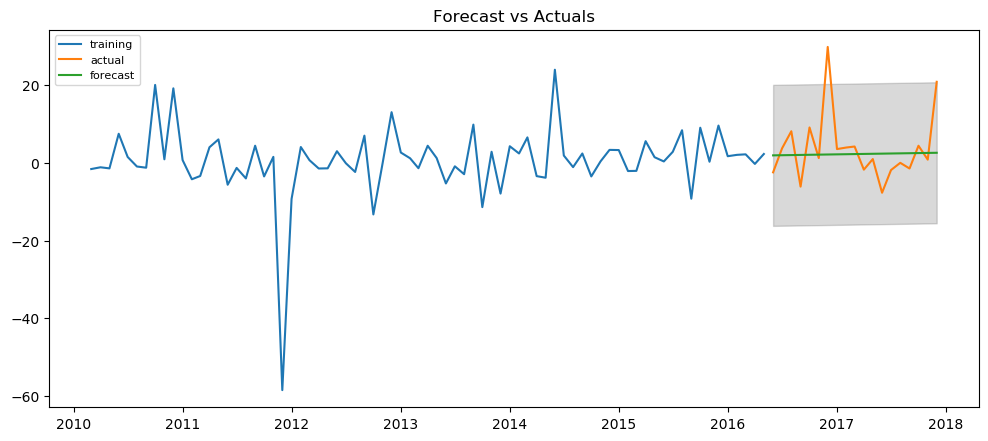

In [37]:
train = d_deseason[:75]
test = d_deseason[75:]
n_periods = 24

model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast (resulted in forecast, standard error, and confidence interval)
fc, se, conf = fitted.forecast(19, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [38]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
  
    return({'mape':mape,'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test)

{'mape': 33.129333922195066,
 'corr': 0.008189917796510864,
 'minmax': 1.258019872216162}

In [39]:
#Auto pd.arima
import pmdarima as pm

model = pm.auto_arima(d_deseason, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series (1 as monthly)
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

C:\Users\GILANG\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Fit ARIMA: order=(1, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0); AIC=687.887, BIC=692.974, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=689.884, BIC=697.514, Fit time=0.020 seconds
Fit ARIMA: order=(0, 0, 1); AIC=689.885, BIC=697.514, Fit time=0.019 seconds
Total fit time: 0.063 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   94
Model:                     ARMA(0, 0)   Log Likelihood                -341.943
Method:                           css   S.D. of innovations              9.196
Date:                Wed, 20 Nov 2019   AIC                            687.887
Time:                        07:00:37   BIC                            692.974
Sample:                             0   HQIC                           689.942
                                                                              
                 coef    std err        

C:\Users\GILANG\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## SARIMA (Seasonal ARIMA)

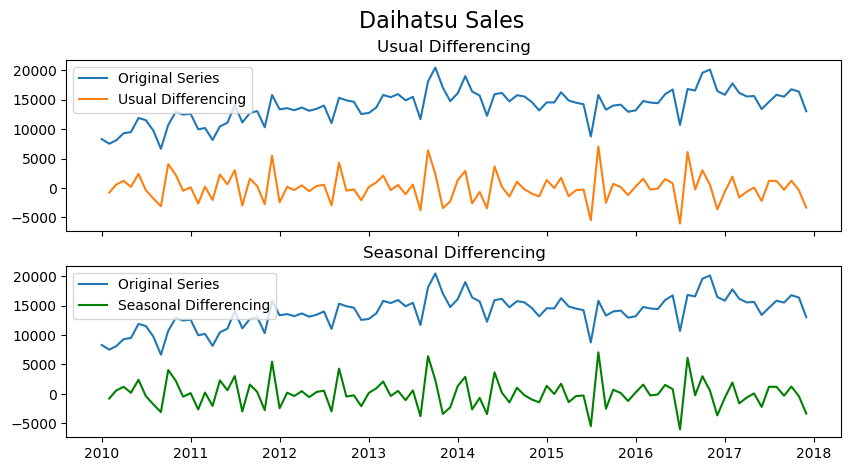

In [40]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(dfdaihatsu, label='Original Series')
axes[0].plot(dfdaihatsu.diff(), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasonal Differencing
axes[1].plot(dfdaihatsu, label='Original Series')
axes[1].plot(dfdaihatsu.diff(), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Daihatsu Sales', fontsize=16)
plt.show()

In [41]:
import pmdarima as pm
model = pm.auto_arima(dfdaihatsu, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # with Seasonality
                      start_P=0, 
                      start_Q = 0, 
                      D=1,            #Determine the Seasonal Difference as 1
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1561.870, BIC=1566.707, Fit time=0.021 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1541.952, BIC=1551.627, Fit time=0.164 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1521.195, BIC=1530.870, Fit time=0.856 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1521.993, BIC=1534.087, Fit time=1.232 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1544.062, BIC=1551.319, Fit time=0.048 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1521.159, BIC=1533.253, Fit time=2.659 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1522.449, BIC=1536.962, Fit time=2.986 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 2, 12); AIC=1542.590, BIC=1552.265, Fit time=1.784 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 2, 12); AIC=1522.642, BIC=1537.155, Fit time=3.025 seconds
Fit ARIMA: order=(1, 1, 2) s

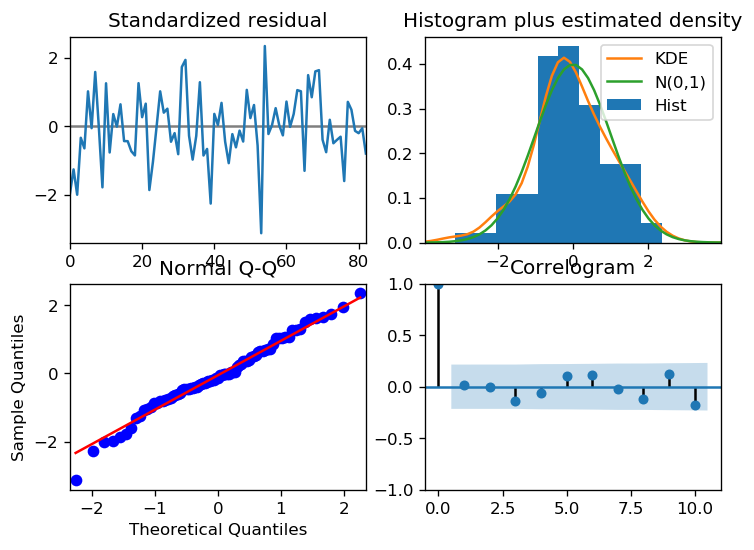

In [42]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

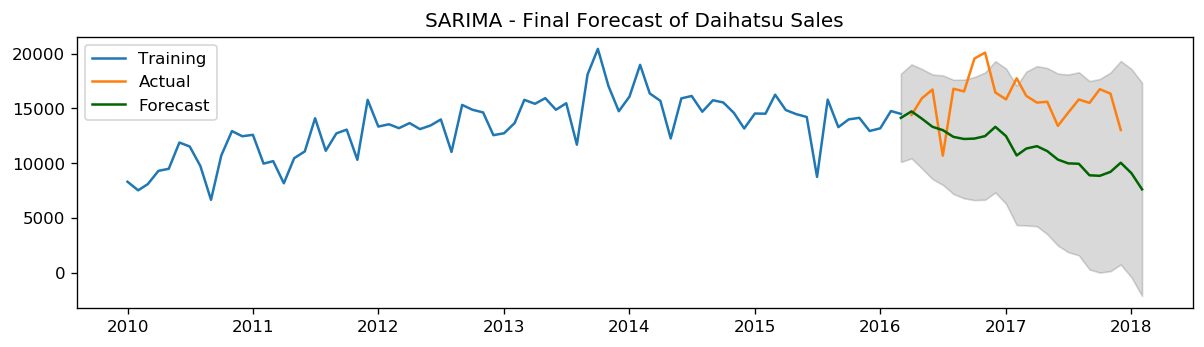

In [43]:
n_periods = 24
train = dfdaihatsu[:75]
test = dfdaihatsu[75:]

fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True) #Return the Confidence Interval
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train, label ='Training')
plt.plot(test, label = 'Actual')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Daihatsu Sales")
plt.show()

In [44]:
# forecast_accuracy(fc, test)

# SARIMAX
karena data = 0.0 (seasonal)

In [45]:
result_mul = sm.tsa.seasonal_decompose(dfdaihatsu[-24:],   # 24 last months
                                model='multiplicative', 
                                extrapolate_trend='freq')

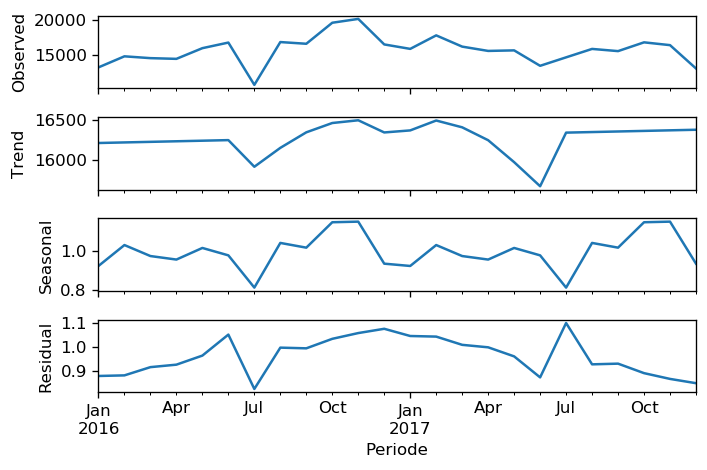

In [46]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
fig = result_mul.plot()
plt.show()

In [47]:
seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

In [48]:
dfdaihatsu = pd.DataFrame(dfdaihatsu)
dfdaihatsu['month'] = dfdaihatsu.index.month
dfD = pd.merge(dfdaihatsu, seasonal_index, how='left', on='month')
dfD.columns = ['Daihatsu_sales_value_average', 'month', 'seasonal_index']
dfD.index = dfdaihatsu.index  # reassign the index.

In [49]:
dfD.head()

,Daihatsu_sales_value_average,month,seasonal_index
Periode,,,
2010-01-01,8302.0,1,0.924697
2010-02-01,7518.0,2,1.032133
2010-03-01,8084.0,3,0.975634
2010-04-01,9298.0,4,0.957579
2010-05-01,9485.0,5,1.017202


In [50]:

smaxmodel = pm.auto_arima(dfD[['Daihatsu_sales_value_average']], exogenous=dfD[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

smaxmodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1537.987, BIC=1552.572, Fit time=1.312 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=1571.461, BIC=1578.753, Fit time=0.016 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=1553.644, BIC=1565.798, Fit time=0.235 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1561.365, BIC=1573.519, Fit time=0.507 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=1539.593, BIC=1556.609, Fit time=1.505 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=1555.294, BIC=1567.448, Fit time=0.083 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 2, 12); AIC=1538.899, BIC=1555.914, Fit time=3.258 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=1542.971, BIC=1562.418, Fit time=4.609 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1547.571, BIC=1564.586, Fit time=0.583 seconds
Fit ARIMA: order=(1, 0, 0) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -762.993
Date:                            Wed, 20 Nov 2019   AIC                           1537.987
Time:                                    07:01:17   BIC                           1552.572
Sample:                                         0   HQIC                          1543.850
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -11.3408     38.359     -0.296      0.767     -86.524      63.842
x1            13.2179   5129.223      0.003      0.998      -1e+04    1.01e+04
ar.L1          0.9850      0.027     35.855      0.000       0.931       1.039
ma.L1         -0.8290      0.064    -12.956      0.000      -0.954      -0.704
ma.S.L12      -0.6542      0.158     -4.150      0.000      -0.963      -0.345
sigma2      5.105e+06      8.244   6.19e+05      0.000     5.1e+06     5.1e+06
===================================================================================
Ljung-Box (Q):                       38.96   Jarque-Bera (JB):                 1.95
Prob(Q):                              0.52   Prob(JB):                         0.38
Heteroskedasticity (H):               0.93   Skew:                             0.01
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.94e+21. Standard errors may be unstable.
"""

In [51]:
seasonal_index

,Daihatsu,month
Periode,,
2017-01-01,0.924697,1
2017-02-01,1.032133,2
2017-03-01,0.975634,3
2017-04-01,0.957579,4
2017-05-01,1.017202,5
2017-06-01,0.979205,6
2017-07-01,0.813549,7
2017-08-01,1.043045,8
2017-09-01,1.018743,9


SARIMAX done..
forcast next 24month

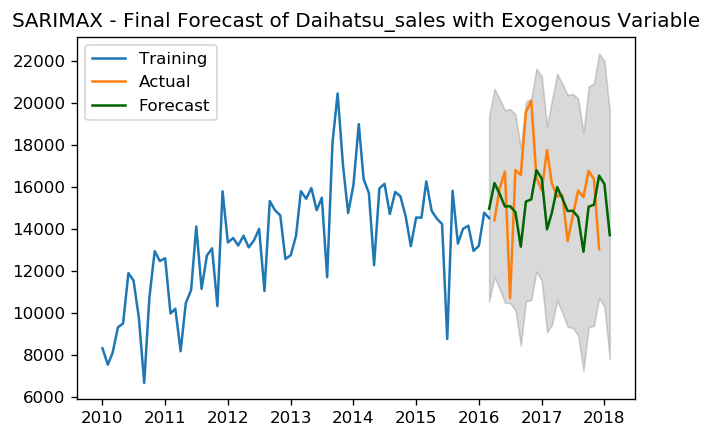

In [52]:
train = dfD[:75]
test = dfD[75:]
n_periods = 24

fitted, confint = smaxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index['Daihatsu'], 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train['Daihatsu_sales_value_average'], label ='Training')
plt.plot(test['Daihatsu_sales_value_average'], label = 'Actual')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX - Final Forecast of Daihatsu_sales with Exogenous Variable")
plt.show()

## Prophet

In [53]:
test = dfdaihatsu.copy()

In [54]:
test

,Daihatsu,month
Periode,,
2010-01-01,8302.0,1
2010-02-01,7518.0,2
2010-03-01,8084.0,3
2010-04-01,9298.0,4
2010-05-01,9485.0,5
2010-06-01,11886.0,6
2010-07-01,11524.0,7
2010-08-01,9741.0,8
2010-09-01,6652.0,9


In [55]:
test.drop('month', axis = 1, inplace = True)

In [56]:
test.reset_index(inplace=True)

In [57]:
prediction_size = 7
train_df = test[:-prediction_size]

In [58]:
from fbprophet import Prophet 
m = Prophet()

In [59]:
train_df.columns = ['ds','y']
train_df.head()

,ds,y
0,2010-01-01,8302.0
1,2010-02-01,7518.0
2,2010-03-01,8084.0
3,2010-04-01,9298.0
4,2010-05-01,9485.0


In [60]:
m.fit(train_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [61]:
future = m.make_future_dataframe(periods=prediction_size, freq='M')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,9718.518735,7171.331209,11570.795377,9718.518735,9718.518735,-345.054419,-345.054419,-345.054419,-345.054419,-345.054419,-345.054419,0.0,0.0,0.0,9373.464316
1,2010-02-01,9831.913031,7808.263636,12498.935191,9831.913031,9831.913031,344.105748,344.105748,344.105748,344.105748,344.105748,344.105748,0.0,0.0,0.0,10176.018780
2,2010-03-01,9934.333686,7985.621028,12452.999671,9934.333686,9934.333686,293.496623,293.496623,293.496623,293.496623,293.496623,293.496623,0.0,0.0,0.0,10227.830309
3,2010-04-01,10047.727982,7285.968323,11903.713478,10047.727982,10047.727982,-496.867201,-496.867201,-496.867201,-496.867201,-496.867201,-496.867201,0.0,0.0,0.0,9550.860780
4,2010-05-01,10157.464398,7476.103619,11839.603277,10157.464398,10157.464398,-551.445849,-551.445849,-551.445849,-551.445849,-551.445849,-551.445849,0.0,0.0,0.0,9606.018548


In [62]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,9718.518735,7171.331209,11570.795377,9718.518735,9718.518735,-345.054419,-345.054419,-345.054419,-345.054419,-345.054419,-345.054419,0.0,0.0,0.0,9373.464316
1,2010-02-01,9831.913031,7808.263636,12498.935191,9831.913031,9831.913031,344.105748,344.105748,344.105748,344.105748,344.105748,344.105748,0.0,0.0,0.0,10176.018780
2,2010-03-01,9934.333686,7985.621028,12452.999671,9934.333686,9934.333686,293.496623,293.496623,293.496623,293.496623,293.496623,293.496623,0.0,0.0,0.0,10227.830309
3,2010-04-01,10047.727982,7285.968323,11903.713478,10047.727982,10047.727982,-496.867201,-496.867201,-496.867201,-496.867201,-496.867201,-496.867201,0.0,0.0,0.0,9550.860780
4,2010-05-01,10157.464398,7476.103619,11839.603277,10157.464398,10157.464398,-551.445849,-551.445849,-551.445849,-551.445849,-551.445849,-551.445849,0.0,0.0,0.0,9606.018548
5,2010-06-01,10270.858694,8216.473414,13011.277416,10270.858694,10270.858694,449.134402,449.134402,449.134402,449.134402,449.134402,449.134402,0.0,0.0,0.0,10719.993095
6,2010-07-01,10380.595109,7729.279761,12353.467783,10380.595109,10380.595109,-432.134661,-432.134661,-432.134661,-432.134661,-432.134661,-432.134661,0.0,0.0,0.0,9948.460448
7,2010-08-01,10493.989405,7970.975332,12508.616168,10493.989405,10493.989405,-336.392707,-336.392707,-336.392707,-336.392707,-336.392707,-336.392707,0.0,0.0,0.0,10157.596698
8,2010-09-01,10607.383701,8591.661736,13317.890647,10607.383701,10607.383701,186.505326,186.505326,186.505326,186.505326,186.505326,186.505326,0.0,0.0,0.0,10793.889027
9,2010-10-01,10717.120116,9968.803005,14445.320765,10717.120116,10717.120116,1431.694991,1431.694991,1431.694991,1431.694991,1431.694991,1431.694991,0.0,0.0,0.0,12148.815107


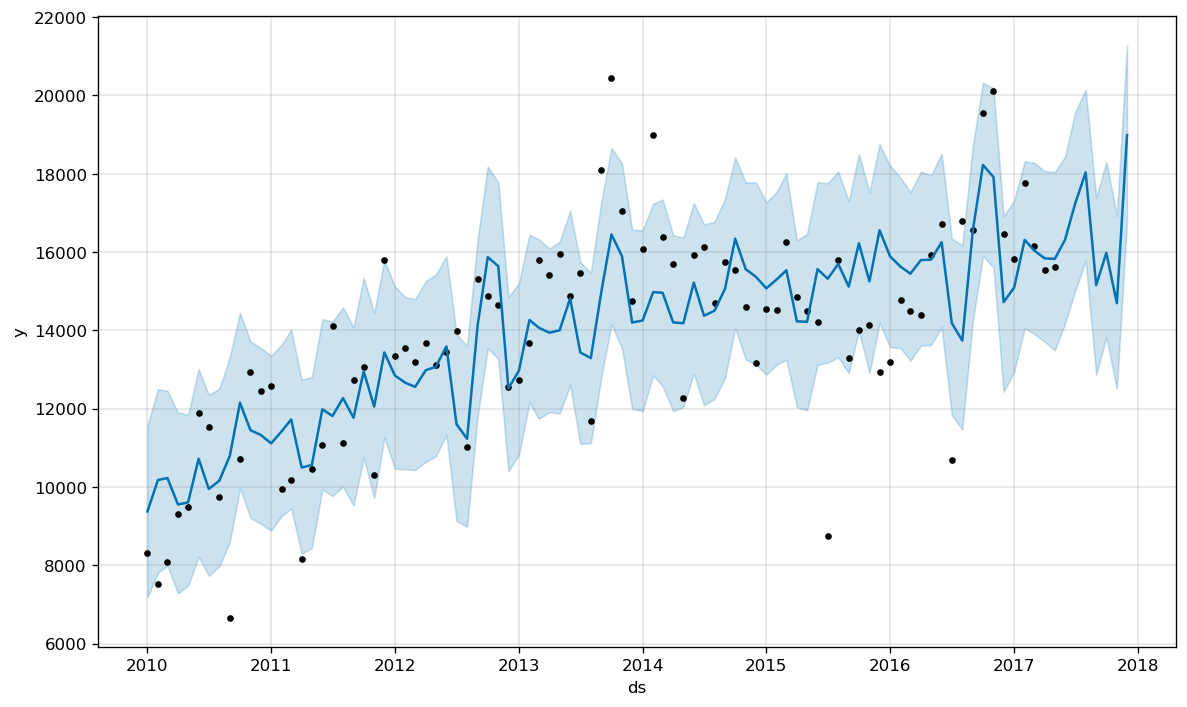

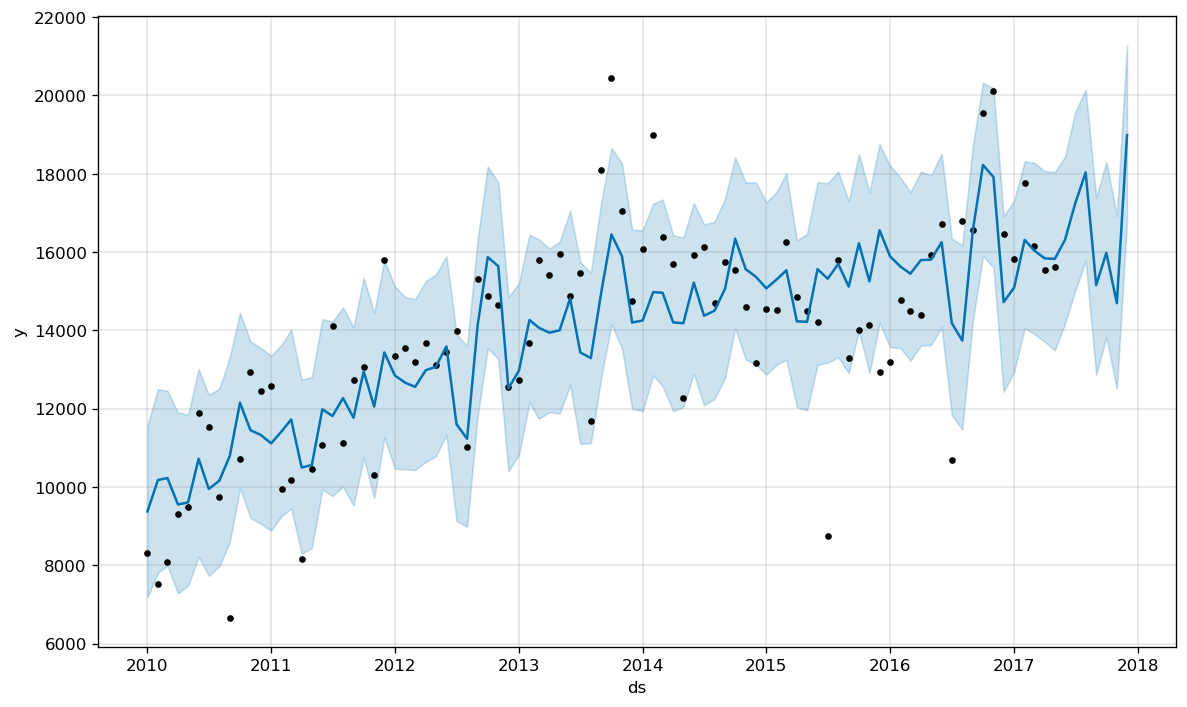

In [63]:
m.plot(forecast)

In [64]:
test.head()

,Periode,Daihatsu
0,2010-01-01,8302.0
1,2010-02-01,7518.0
2,2010-03-01,8084.0
3,2010-04-01,9298.0
4,2010-05-01,9485.0


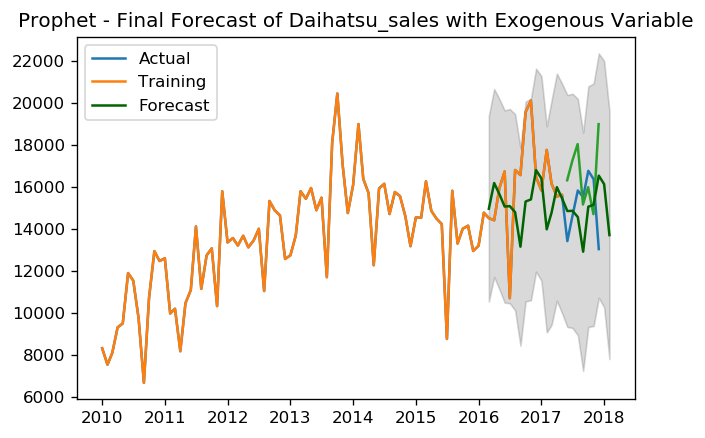

In [65]:
plt.plot(test['Periode'],test['Daihatsu'], label = 'Actual')
plt.plot(train_df['ds'],train_df['y'], label ='Training')
plt.plot(forecast['ds'].iloc[-7:],forecast['yhat'].iloc[-7:])
plt.plot(fitted_series, color='darkgreen', label ='Forecast')

plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Prophet - Final Forecast of Daihatsu_sales with Exogenous Variable")
plt.show()

## Final model Daihatsu

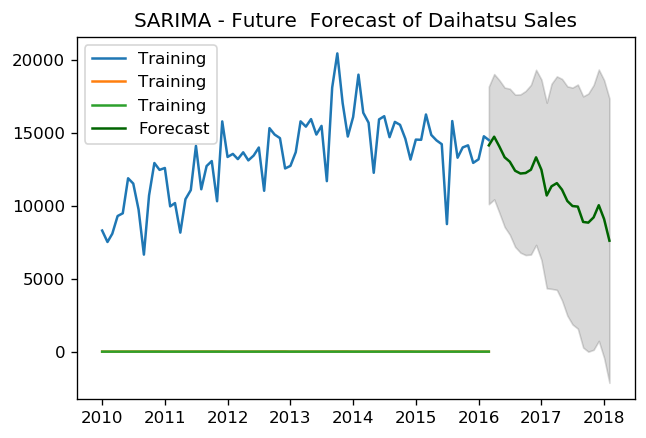

In [66]:
training=dfdaihatsu
n_periode=12

fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True) #Return the Confidence Interval
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

plt.plot(train, label ='Training')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Future  Forecast of Daihatsu Sales")
plt.show()

In [67]:
fitted_series

2016-03-01    14141.217827
2016-04-01    14733.847421
2016-05-01    14069.183933
2016-06-01    13322.618144
2016-07-01    13020.918170
2016-08-01    12401.588144
2016-09-01    12211.263269
2016-10-01    12246.370094
2016-11-01    12473.067697
2016-12-01    13320.114441
2017-01-01    12471.564034
2017-02-01    10704.983965
2017-03-01    11335.009346
2017-04-01    11552.672343
2017-05-01    11103.567332
2017-06-01    10327.017184
2017-07-01     9982.118672
2017-08-01     9943.525791
2017-09-01     8891.822059
2017-10-01     8844.790383
2017-11-01     9205.338118
2017-12-01    10038.583290
2018-01-01     9089.380306
2018-02-01     7605.716237
Freq: MS, dtype: float64

In [68]:
daihatsu_predict=pd.DataFrame(fitted_series)
daihatsu_predict.columns=['Daihatsu']

In [69]:
daihatsu_predict

,Daihatsu
2016-03-01,14141.217827
2016-04-01,14733.847421
2016-05-01,14069.183933
2016-06-01,13322.618144
2016-07-01,13020.918170
2016-08-01,12401.588144
2016-09-01,12211.263269
2016-10-01,12246.370094
2016-11-01,12473.067697
2016-12-01,13320.114441


In [70]:
daihatsu_predict.to_csv('daihatsu_predict.csv')